# **Factors** affect a loan’s **outcome status**

## by Ibn-Mohey

## Investigation Overview

> determine the **factors** may affect a loan’s **outcome status**

## Dataset Overview

> This data set contains **113,937 loans** with **81 variables** on each loan, including loan **amount**, **borrower rate (or interest rate**), **current loan status**, borrower **income**, and many others.

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [6]:
# load in the dataset into a pandas dataframe
import os
path = r'E:\career\Dataa\udacity\Advanced Data Analysis Nanodegree Program\4. Data Visualization\08.Communicate Data Findings project\Data'
os.chdir(path)
features_df = pd.read_csv('features_df.csv')

In [8]:
bc = sb.color_palette()[0]

## Main notes on the Dataset itself

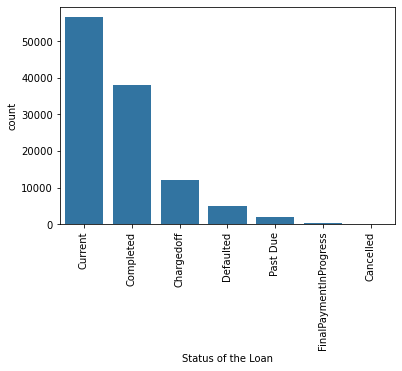

In [9]:
sb.countplot(data = features_df , x = 'LoanStatus', color = bc , order = features_df['LoanStatus'].value_counts().index)
plt.xlabel('Status of the Loan')
plt.xticks(rotation = 90);

#### insight 
Most of the loans are current or completed. which is good sign

but there is also alot of charged off, defaulted and past due ones

or goal to see what made this happen

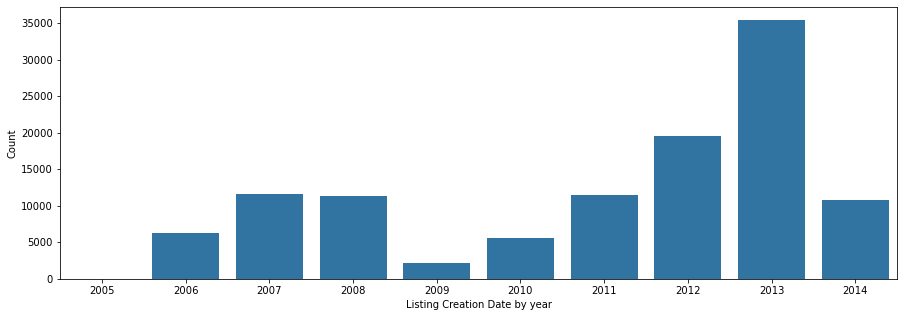

In [10]:
plt.figure(figsize = [15, 5])
sb.countplot(data= features_df, x= 'ListingCreationDate_year', color= bc,)
plt.xlabel('Listing Creation Date by year')
plt.ylabel('Count');

#### insight
>it's increasing number over time with big spike at 2013 and decrease at 2014 which i think cuz not all data were collected in 2014

> there is some thing wired from 2007 - 2008 to 2009 and it was **Financial crisis of 2007–2008**

> Financial crisis of 2007–2008 effect can appear here 

## Correlation Betweet Variables

In [51]:
overlook_var1 = ['LoanOriginalAmount', 'BorrowerAPR', 'StatedMonthlyIncome','DebtToIncomeRatio','EstimatedEffectiveYield']
overlook_var2 = ['EstimatedEffectiveYield' , 'EstimatedLoss', 'EstimatedReturn', 'LoanOriginalAmount'
                , 'LP_CustomerPayments', 'LP_CustomerPrincipalPayments','LP_InterestandFees','LP_ServiceFees','LP_CollectionFees'
               ,'LP_GrossPrincipalLoss','LP_NetPrincipalLoss','LP_NonPrincipalRecoverypayments']

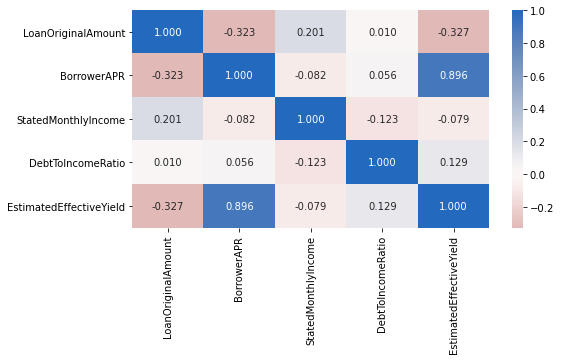

In [52]:
plt.figure(figsize = [8, 4])
sb.heatmap(features_df[overlook_var1].corr(), annot = True, fmt = '.3f',cmap = 'vlag_r', center = 0);

#### insight
>there is some negative correlation betweet borrower APR and loan original amount with value of **-0.323**
and that makes perfect sense 


>there is some positive correlation betweet borrower loan original amount and stated monthly income with value of **0.201**
another make sense statement as borrowers with more monthly income could loan more money

>some big positive correlation betweet Estimated Effective Yield and BorrowerAPR with vlaue **0.896**

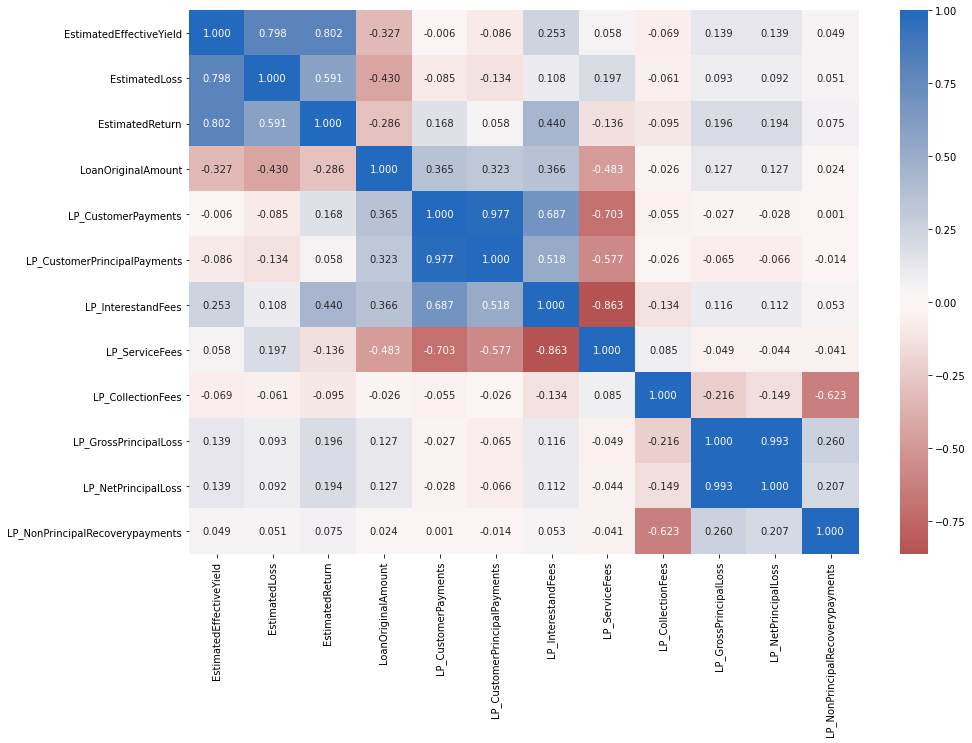

In [53]:
plt.figure(figsize = [15, 10])
sb.heatmap(features_df[overlook_var2].corr(), annot = True, fmt = '.3f', cmap = 'vlag_r', center = 0);

#### this shows us that 
1. **EstimatedEffectiveYield** has **negative** correlation with **EstimatedLoss**, and **positive** with **EstimatedReturn**
2. **EstimatedLoss** has **negative** correlation with **EstimatedReturn**
3. **EstimatedReturn** has **positive** correlation with **EstimatedEffectiveYield**, and **negative** with **EstimatedLoss**
4. **LP_CustomerPayments** has **positive** correlation with **LP_CustomerPrincipalPayments**


5. **LP_CustomerPrincipalPayments** has **positive** correlation with **LP_CustomerPayments**
6. **LP_ServiceFees** has **negative** correlation with **LP_CustomerPayments , LP_CustomerPrincipalPayments** and **LP_InterestandFees**
7. **LP_GrossPrincipalLoss** has **positive** correlation with **LoanOriginalAmount and LP_NetPrincipalLoss**
8. **LP_NetPrincipalLoss** has **positive** correlation with **LoanOriginalAmount and LP_GrossPrincipalLoss**

## LoanStatus and it's factors



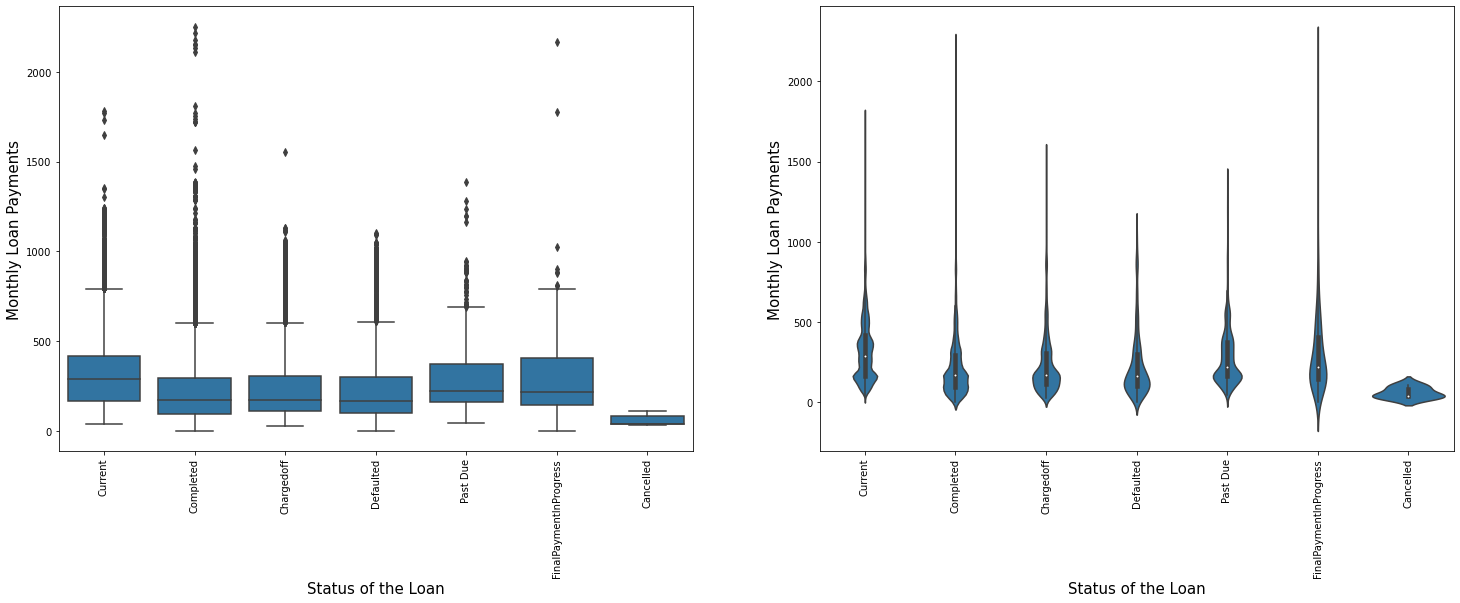

In [54]:
plt.figure(figsize = [25, 18])
plt.subplot(2, 2, 1)
sb.boxplot(data = features_df, x = 'LoanStatus', y = 'MonthlyLoanPayment', color = bc, order = features_df['LoanStatus'].value_counts().index)
plt.xticks(rotation=90, size = 10)
plt.xlabel('Status of the Loan', size = 15)
plt.ylabel('Monthly Loan Payments', size = 15)
plt.subplot(2, 2, 2)
sb.violinplot(data = features_df, x = 'LoanStatus', y = 'MonthlyLoanPayment', color = bc, order = features_df['LoanStatus'].value_counts().index)
plt.xticks(rotation=90, size = 10)
plt.xlabel('Status of the Loan', size = 15)
plt.ylabel('Monthly Loan Payments', size = 15);

#### insight 
The plots show weird relationship between the **monthly payments** and **the loan Status** loans that are charged-off, loans with past due payments and defaulted loans have almost same **average monthly payments** with others like current and completed

In [55]:
# iss = ['Term','EmploymentStatus','IncomeRange']
# pss = ['Length of the Loan (in month)','Status of Employment','Income Range']
# for i,p in zip(iss,pss):
#     plt.figure(figsize = [20,2])
#     ax = sb.countplot(data = features_df, x = 'LoanStatus', hue = i, order = features_df['LoanStatus'].value_counts().index)
#     plt.legend(loc = 1, ncol = 3, title = p)
#     plt.xticks(rotation = 0)
#     plt.xlabel('Status of the Loan', size = 15);
#     ax.set_ylabel("Count", size = 15);
    
def countplotonLoanStatus(y,**kwargs):
    plt.figure(figsize = [20,10])
    ax = sb.countplot(data = features_df, x = 'LoanStatus', hue = y, order = features_df['LoanStatus'].value_counts().index)
    plt.legend(loc = 1, ncol = 3, title = p)
    plt.xticks(rotation = 0)
    plt.xlabel('Status of the Loan', size = 15);
    ax.set_ylabel("Count", size = 15);


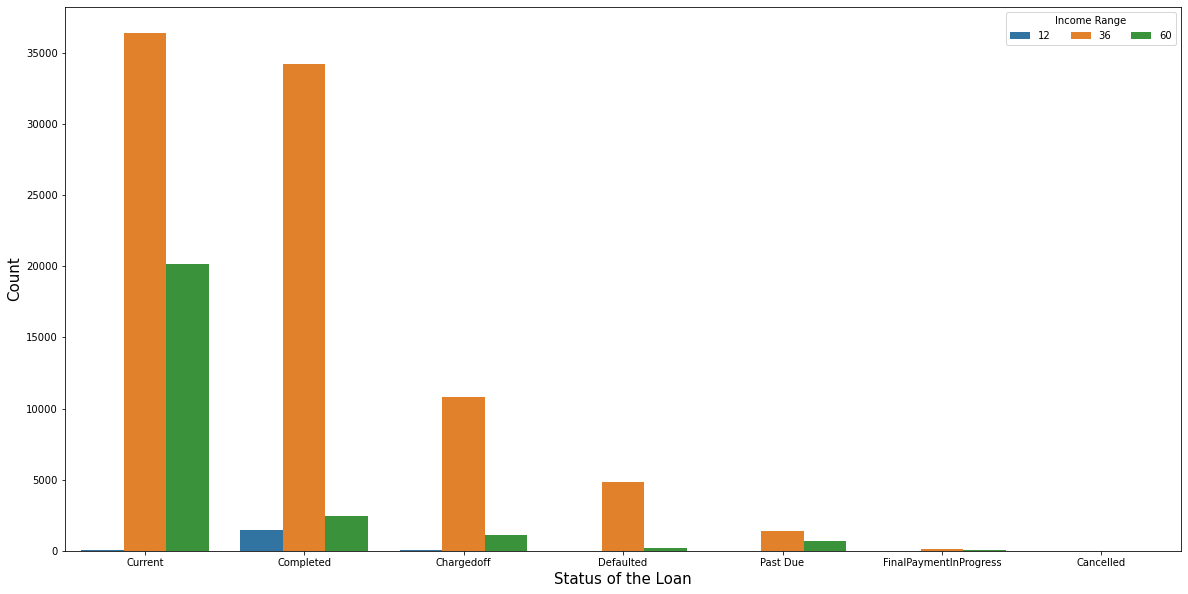

In [56]:
countplotonLoanStatus('Term')

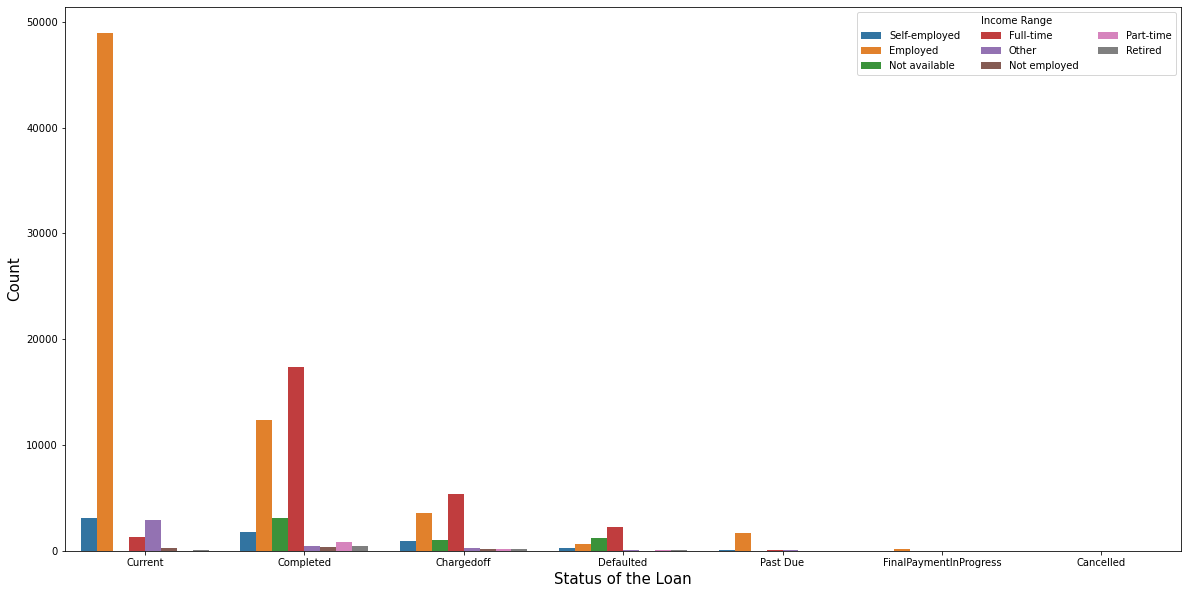

In [57]:
countplotonLoanStatus('EmploymentStatus')

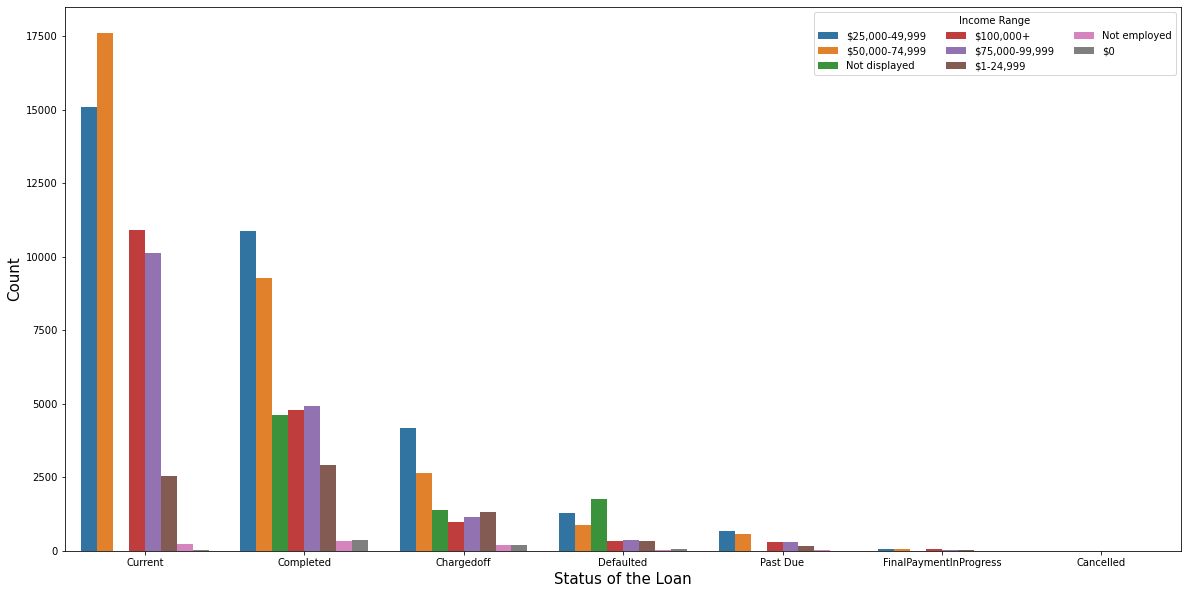

In [58]:
countplotonLoanStatus('IncomeRange')

#### final insight
loans that are **charged-off**, loans with **past due payments** and **defaulted loans** have **slightly higher average monthly payments**  compare to others like **current and completed**

loans that are **charged-off**, loans with **past due payments** and **defaulted loans** have **in average higher interest rates** compare to others like **current and completed**

loans that are **charged-off**, loans with **past due payments** and **defaulted loans** have almost same **average Original Amount** compare to others like **current and completed**

The **length of the loan** have **NO impact** on the status of the loan.

The **Status of Employment** have **NO impact** on the status of the loan.

The **Income Range** have **NO impact** on the status of the loan.